# Signals dan Sampling

## Bentuk-bentuk sinyal di dunia nyata

Sebelum kita mulai, perlu melakukan instalasi untuk beberapa library:
```bash
pip install neurokit2 obspy scipy PyWavelets mne
```

Setelah itu kita melakukan import untuk library-library diatas

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pywt
from scipy import signal
from obspy.core import UTCDateTime
from obspy.clients.syngine import Client

- `neurokit2` adalah library yang berisi fungsi-fungsi untuk analisis sinyal EEG (electroencephalography)
- `mne` adalah library yang berisi fungsi-fungsi untuk analisis sinyal EEG (electroencephalography)
- `obspy` adalah library yang berisi fungsi-fungsi untuk analisis sinyal seismik
- `scipy` adalah library yang berisi fungsi-fungsi untuk analisis sinyal
- `PyWavelets` adalah library yang berisi fungsi-fungsi untuk analisis sinyal

### Sinyal Fisiologis
#### Sinyal EEG (Electroencephalography)

- Sinyal EEG adalah sinyal yang dihasilkan oleh otak manusia (encephalon)
- Sinyal EEG yang tidak diproses, tidak bisa diartikan secara kasat mata

> Warning:
> Menjalankan code ini (hanya bagian EEG) akan mengunduh sample data MNE sebesar 2.95GB. Boleh di skip jika anda tidak punya bandwidth / internet yang memadai

In [5]:
eeg_signal = nk.eeg_simulate(duration=10, sampling_rate=1000, noise=0.5, random_state=2024)

Using default location ~/mne_data for sample...
Creating C:\Users\ACER\mne_data


  8%|###                                   | 132M/1.65G [01:19<13:04, 1.94MB/s]

KeyboardInterrupt: 

  8%|###                                   | 132M/1.65G [01:30<13:04, 1.94MB/s]

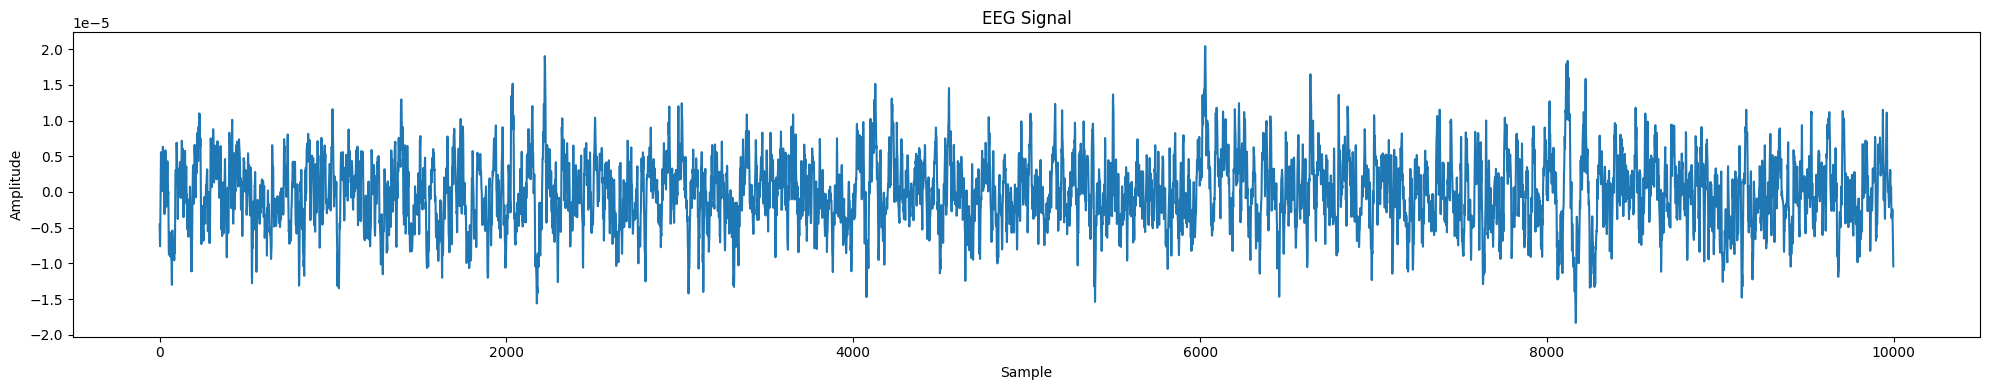

In [3]:
plt.figure(figsize=(20, 4))
plt.plot(eeg_signal)
plt.title("EEG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

#### Sinyal ECG (Electrocardiography)
- Sinayl ECG adalah sinyal yang dihasilkan oleh jantung manusia (cardio)

In [55]:
ecg_signal = nk.ecg_simulate(duration=8, sampling_rate=1000, heart_rate=65, noise=0.2, random_state=240925)

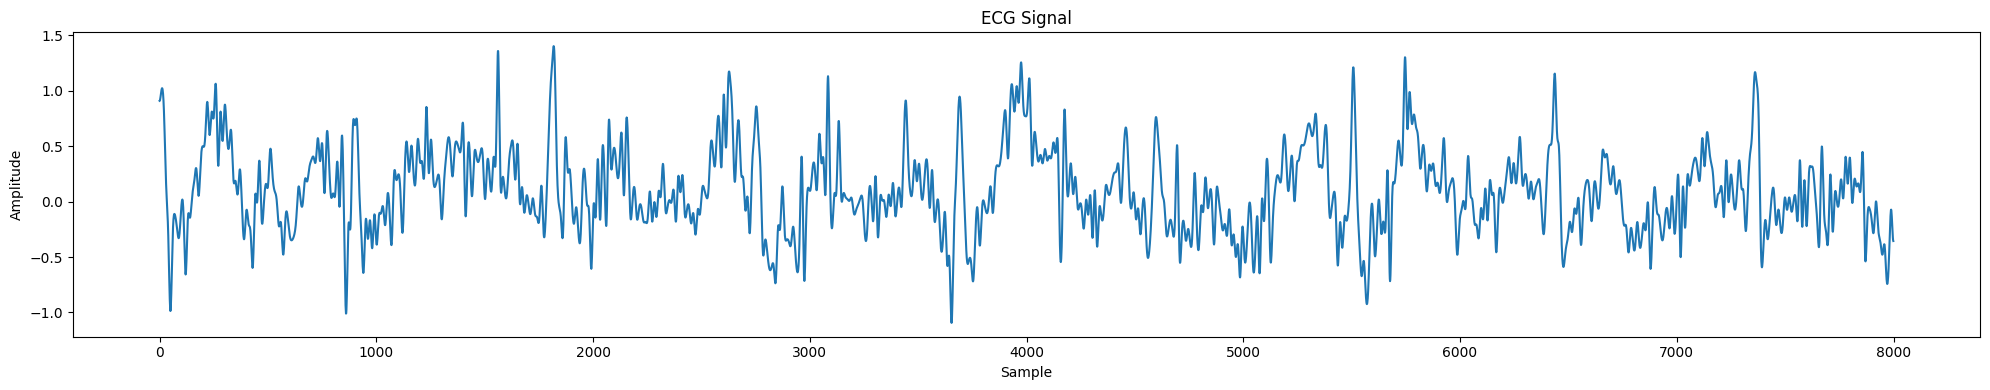

In [54]:
plt.figure(figsize=(20, 4))
plt.plot(ecg_signal)
plt.title("ECG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Mari kita analisis**
- Dalam 8000 sampel, terdapat 9 buah puncak `R` (R-peaks) dalam sinyal ECG
- Sample rate (sampling frequency) dari sinyal ECG adalah 1000 Hz
- *Berapa BPM kah detak jantung dari ECG ini?* (Dalam satu menit, berapa kali jantung berdetak)

**Cara Berpikir**:
- Sample rate adalah 1000Hz, artinya dalam satu detik terdapat 1000 sampel
- Sehingga, kalau 8000 sampel, berarti 8 detik
- Pertanyannya, kalau 8 detik ada 9 detak jantung, berarti dalam satu menit ada berapa detak jantung?
$$ 
    \text{heart beat (beat / menit)} = \frac{\text{9 satuan detak jantung}}{\text{8 (detik)}} * \text{60 (detik / menit)}
$$


#### Sinyal Respirasi (Pernapasan)

- Sinyal Respirasi adalah sinyal yang dihasilkan oleh pernapasan manusia
- Sinyal ini direkam dengan menggunakan respiratory belt

In [8]:
resp_signal = nk.rsp_simulate(duration=60, sampling_rate=20, respiratory_rate=20, noise=0.1, random_state=2024)

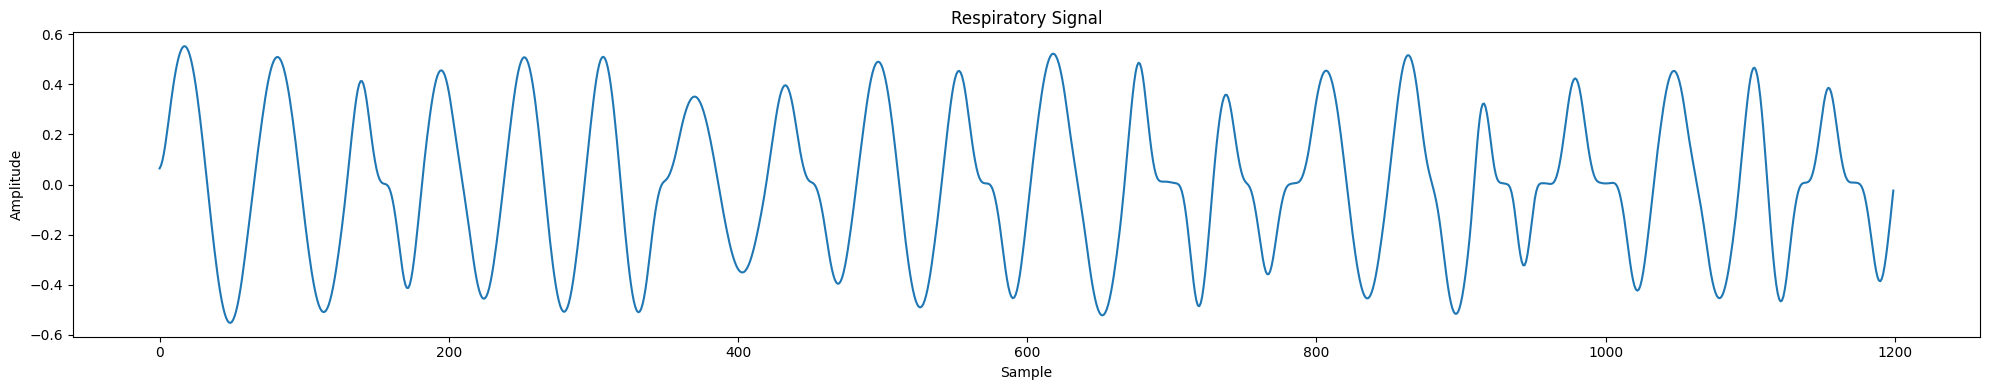

In [9]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal)
plt.title("Respiratory Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

#### Sinyal EMG (Electromyography)
- Sinyal EMG adalah sinyal yang dihasilkan oleh otot manusia

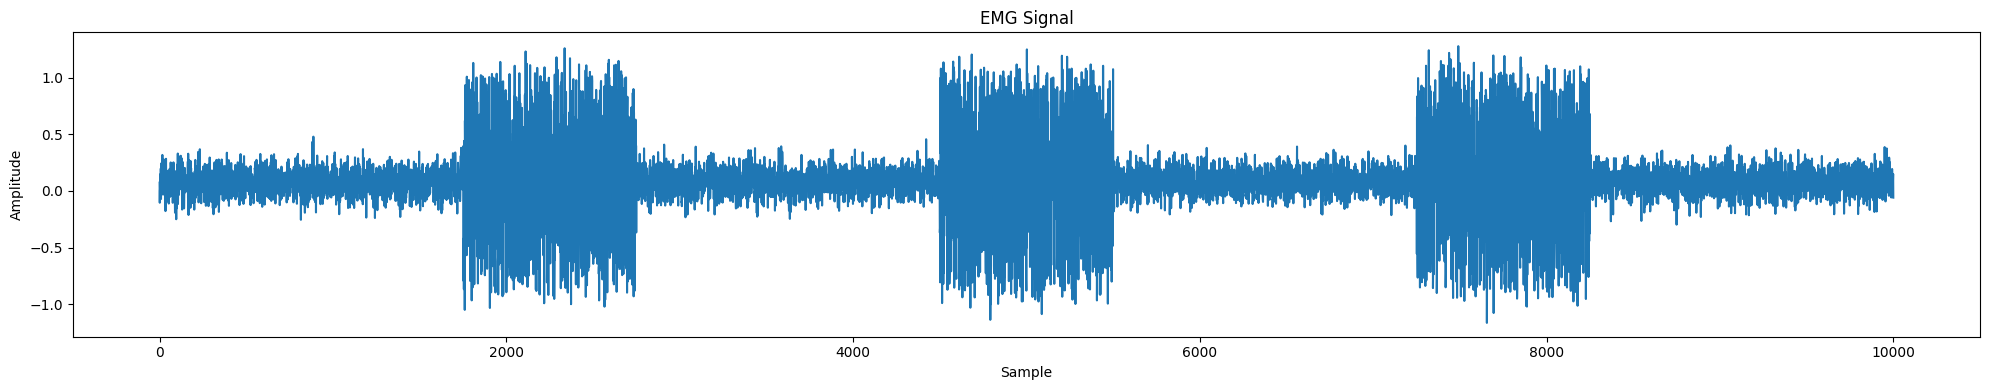

In [10]:
emg_signal = nk.emg_simulate(duration=10, sampling_rate=1000, burst_number=3, noise=0.1, random_state=2024)

plt.figure(figsize=(20, 4))
plt.plot(emg_signal)
plt.title("EMG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

### Sinyal Lingkungan

#### Sinyal Seismik (Gempa Bumi)

In [11]:
client = Client()

origin_time = UTCDateTime("2023-01-01T00:00:00.000")
seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-7.8007839033133575, sourcelongitude=110.37098235071159, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement")

<Figure size 2000x400 with 0 Axes>

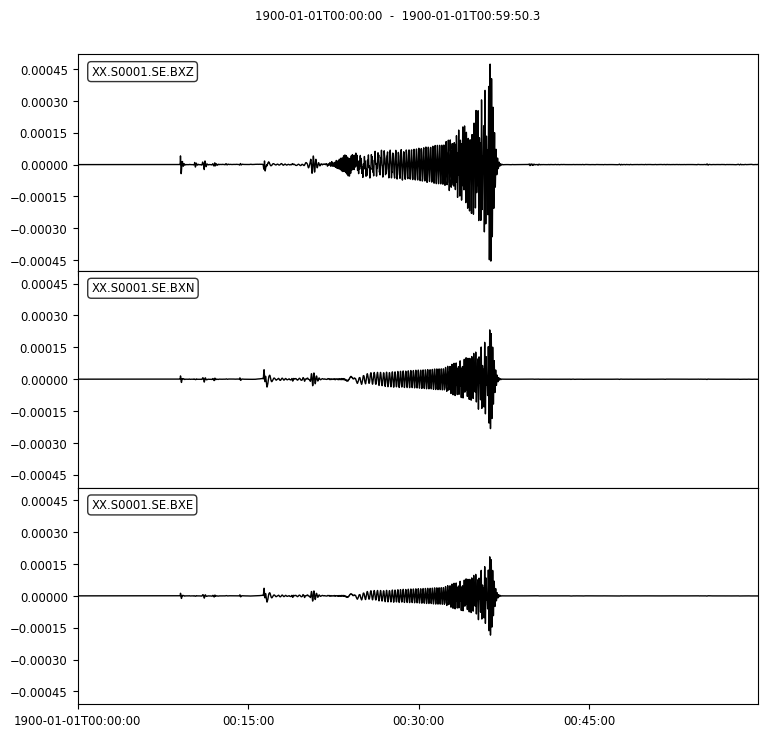

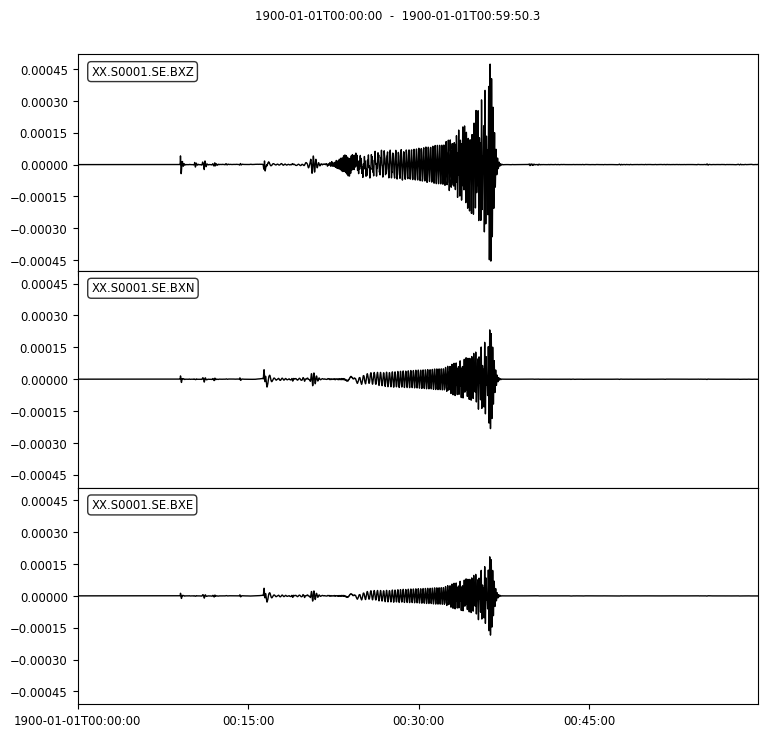

In [12]:
plt.figure(figsize=(20, 4))
seismogram.plot()

#### Sinyal Perubahan Suhu

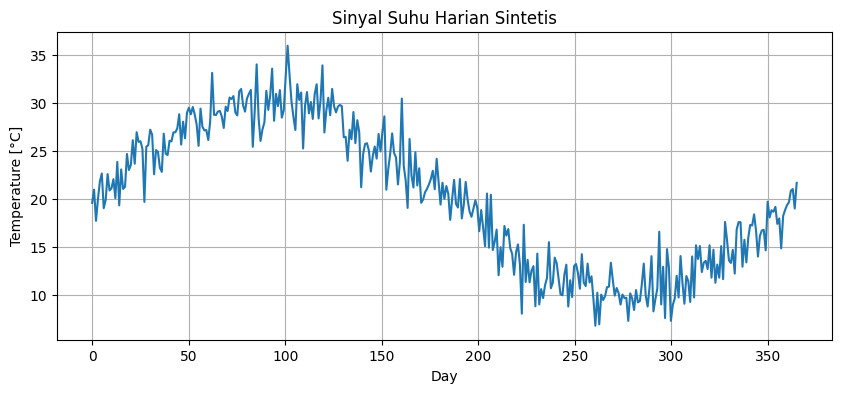

In [13]:
t = np.linspace(0, 365, 365)  # Data satu tahun

# Simulasikan variasi suhu harian dengan noise
temperature_signal = 20 + 10 * np.sin(2 * np.pi * t / 365) + 2 * np.random.normal(size=t.shape)

# Plot sinyal suhu
plt.figure(figsize=(10, 4))
plt.plot(t, temperature_signal)
plt.title('Sinyal Suhu Harian Sintetis')
plt.xlabel('Day')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

### Sinyal Komunikasi
#### Sinyal Radio AM

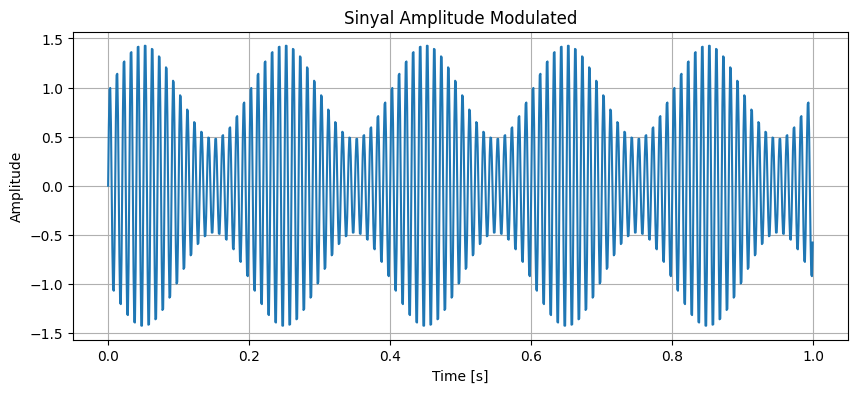

In [14]:
# Parameter
fs = 1000  # Sampling frequency
carrier_freq = 100  # Carrier frequency in Hz
modulating_freq = 5  # Modulating frequency in Hz

t = np.linspace(0, 1, fs, endpoint=False)  # Vektor waktu
carrier = np.sin(2 * np.pi * carrier_freq * t)  # Sinyal pembawa
modulating_signal = 1 + 0.5 * np.sin(2 * np.pi * modulating_freq * t)  # Sinyal modulasi

# Sinyal amplitude modulated
am_signal = carrier * modulating_signal

# Plot sinyal AM
plt.figure(figsize=(10, 4))
plt.plot(t, am_signal)
plt.title('Sinyal Amplitude Modulated')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Sinyal Mekanik
#### Sinyal Getaran

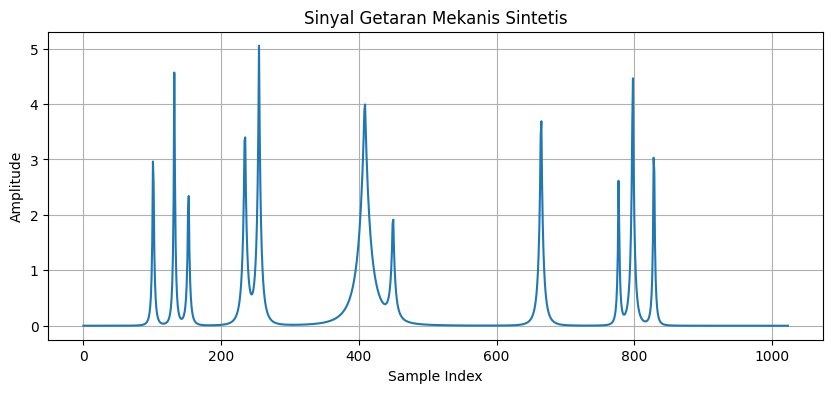

In [15]:
vibration_signal = pywt.data.demo_signal('Bumps', n=1024)

# Plot sinyal getaran
plt.figure(figsize=(10, 4))
plt.plot(vibration_signal)
plt.title('Sinyal Getaran Mekanis Sintetis')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### **Kesimpulan**

Dalam modul hands-on ini, Anda telah mengeksplorasi berbagai jenis sinyal kehidupan nyata di berbagai bidang:

- **Sinyal Fisiologis**: ECG, EEG, pernapasan, dan EMG, yang sangat penting untuk memantau fungsi tubuh.
- **Sinyal Lingkungan**: Sinyal seismik dan suhu, yang berguna dalam mempelajari fenomena alam.
- **Sinyal Komunikasi**: Sinyal AM, yang merupakan dasar dari transmisi data.
- **Sinyal Mekanik**: Sinyal getaran, yang penting untuk pemantauan dan pemeliharaan mesin.

Simulasi ini memberikan gambaran tentang bagaimana sinyal-sinyal dunia nyata dapat dibuat dan dianalisis menggunakan Python, yang merupakan keterampilan yang berharga dalam bidang seperti teknik biomedis, ilmu lingkungan, sistem komunikasi, dan teknik mesin.

---

## Resampling & Interpolating

**Apa itu resampling?**
- Resampling adalah proses mengubah sampling frequency dari sinyal (mengubah banyaknya sampel dalam satu detik)
- Terdapar dua jenis resampling: upsampling dan downsampling

**Apa itu interpolasi?**
- Interpolasi adalah proses mengisi nilai-nilai yang hilang dalam sinyal

**Penjelasan di kelas terkait resampling menggunakan Excel**

<img src="./screenshot/ss-a.png" alt="Contoh Screenshot" width="50%"/>

**Contoh interpolasi sederhana (linear) dari 5Hz ke 10Hz**

<img src="./screenshot/ss-b.png" alt="Contoh Screenshot" width="50%"/>

In [16]:
fs = 20 # Frekuensi sampling
dur = 20 # Durasi sinyal dalam detik

resp_signal = nk.rsp_simulate(duration=dur, sampling_rate=fs, respiratory_rate=20, noise=0.01, random_state=2024)
resp_signal = resp_signal * 10 # Amplifikasi sinyal

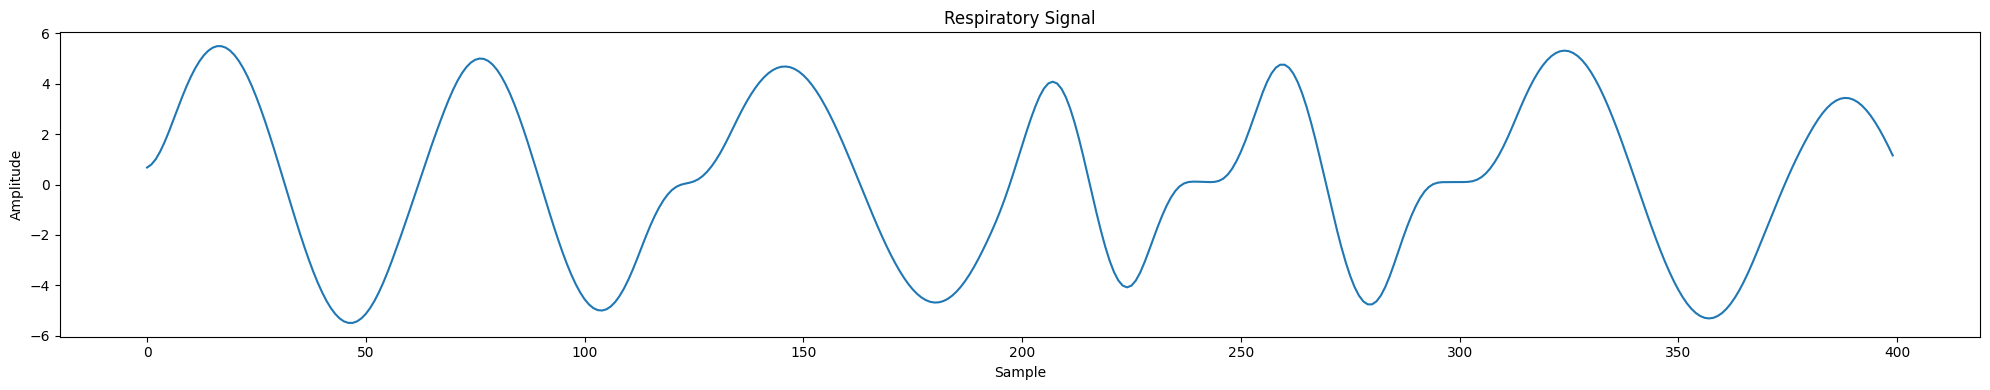

In [17]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal)
plt.title("Respiratory Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Kasus Resample**:
- Kita punya sinyal asli dengan frekuensi sampling 20 Hz (Artinya ada 20 nilai dalam satu detik)
- Total elemen (total sampel) dari sinyal ini adalah 400 sampel
- Kita akan melakukan resample menjadi 10 Hz (Artinya ada 10 nilai dalam satu detik)
- Sehingga, berapa total elemen (total sampel) dari sinyal hasil resample?
    - Fs * Durasi dalam detik = 10 * 20 = 200 sampel

In [18]:
resp_signal_res10 = []

for i in range(0, len(resp_signal), 2):
    resp_signal_res10.append(resp_signal[i])

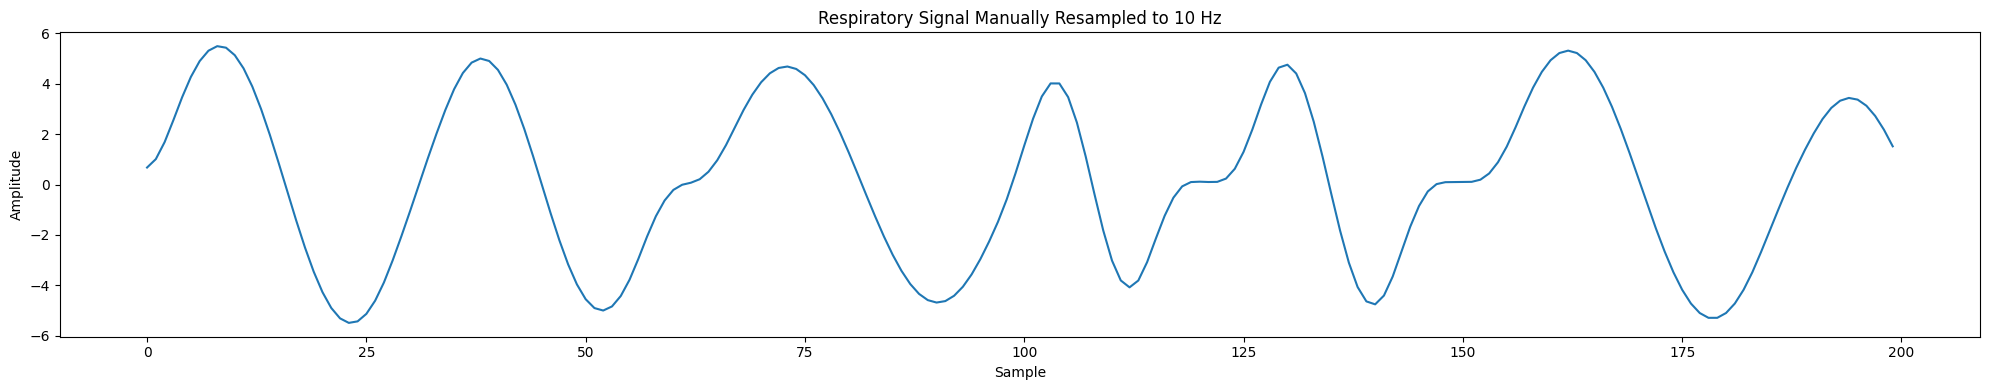

In [19]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal_res10)
plt.title("Respiratory Signal Manually Resampled to 10 Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Cara Kerja Resampling diatas (Secara Manual**)
- Kita akan mengambil setiap 2 elemen dari sinyal asli (karena kita akan downsampling dari 20 Hz menjadi 10 Hz). 20 dibagi 10 = 3
- Kita akan mengambil elemen ke-0, elemen ke-2, elemen ke-4, elemen ke-6, dst
- Hasilnya, kita memiliki sinyal dengan elemen yang berkurang menjadi 200 sampel

**Bagaimana membuatnya dengan cara yang lebih praktis di Python?**

In [61]:
# Interpolate menggunakan Numpy

time_axis = np.linspace(0, len(resp_signal), int(len(resp_signal) * (10 / 20)) )
len(time_axis)
print(len(time_axis))
signal_resampled_interp = np.interp(time_axis, np.arange(len(resp_signal)), resp_signal)

200


Langkah-langkah interpolasi/resampled:
- Buat time axis untuk sinyal yang baru dengan rumus
```python
time_axis = np.linspace(0, panjang_sinyal_asli, panjang sinyal baru)
sinyal_hasil_resample = np.interp(time_axis, np.arange(panjang_sinyal_asli), sinyal_asli)
```

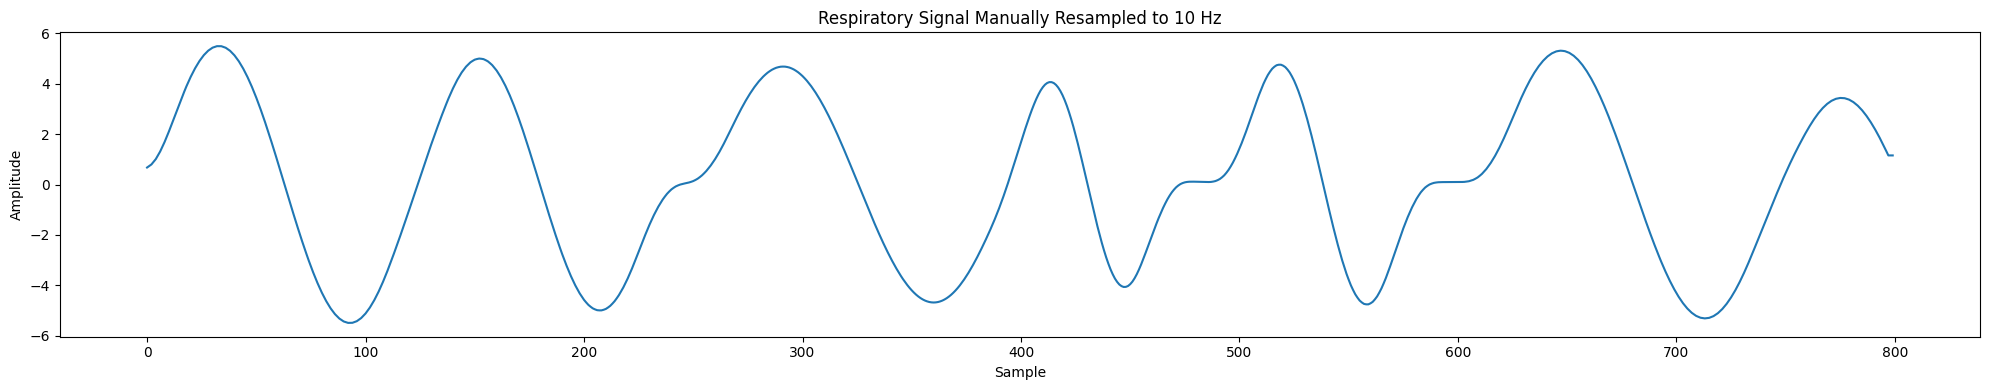

In [57]:
plt.figure(figsize=(20, 4))
plt.plot(signal_resampled_interp)
plt.title("Respiratory Signal Manually Resampled to 10 Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Bagaimana kalau di Upsampling** dari variable `resp_signal` ke `resp_signal_upsampled`?

In [22]:
time_axis = np.linspace(0, len(resp_signal), 800)
signal_upsampled_interp = np.interp(time_axis, np.arange(len(resp_signal)), resp_signal)

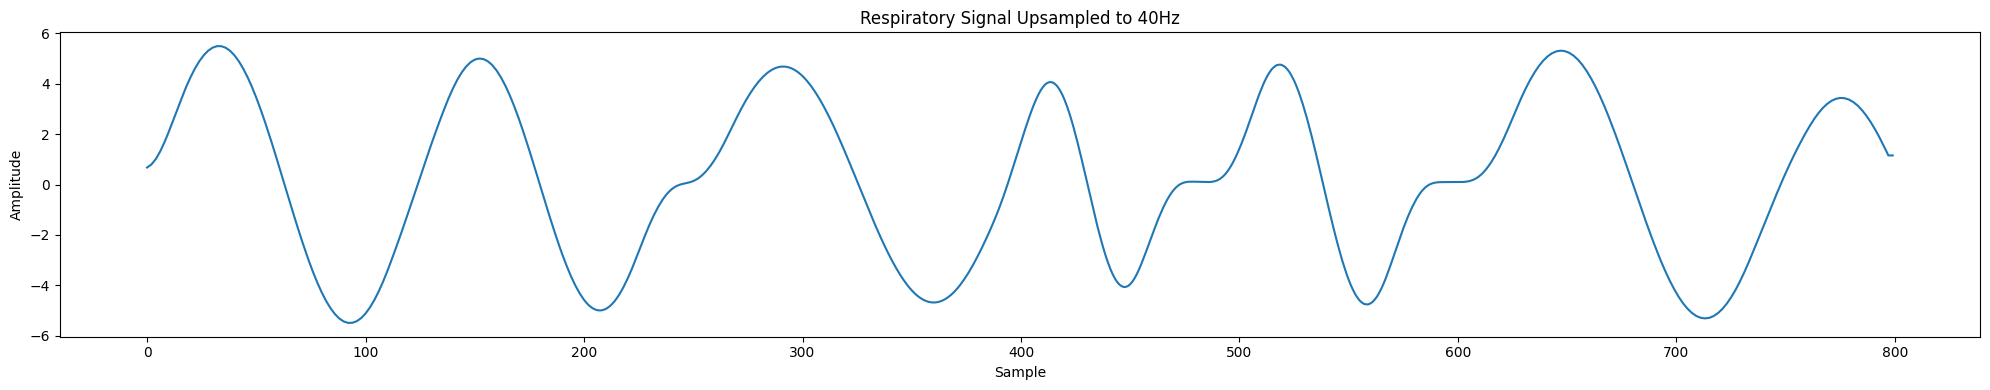

In [23]:
plt.figure(figsize=(20, 4))
plt.plot(signal_upsampled_interp)
plt.title("Respiratory Signal Upsampled to 40Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Downsample Ekstrim**

Dari 20Hz ke 4Hz

In [24]:
fs_target = 4 # Frekuensi sampling target (Hz)
durasi_asli = 20 # dalam detik
panjang_elemen_setelah_resampling = fs_target * durasi_asli

time_axis = np.linspace(0, len(resp_signal), panjang_elemen_setelah_resampling)
resample_extreme = np.interp(time_axis, np.arange(len(resp_signal)), resp_signal)

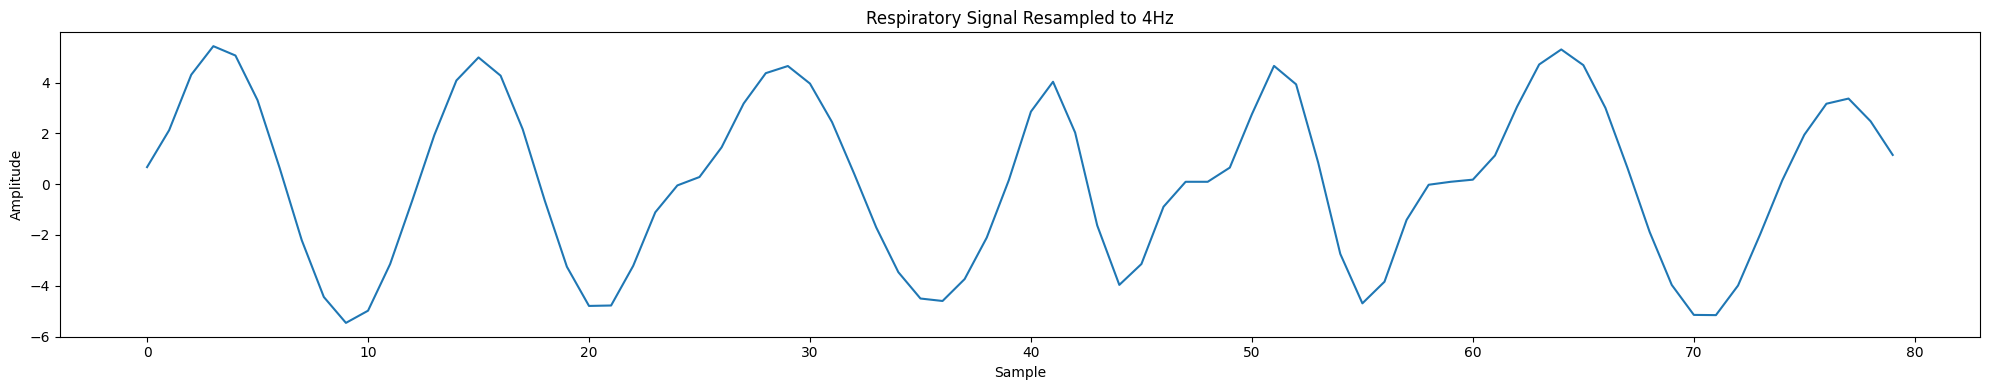

In [25]:
plt.figure(figsize=(20, 4))
plt.plot(resample_extreme)
plt.title("Respiratory Signal Resampled to 4Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

---
## Tugas: `ho1`

#### Instruksi:

5. Buktikanlah bahwa proses downsampling (resampling dengan laju sampling yang lebih rendah) dapat menghilangkan informasi dari sinyal asli. Untuk melakukan hal ini, gunakan sinyal ECG sintetis (dengan method `nk.ecg_simulate`) sesuai spesifikasi berikut:
    - Durasi: `Berdasarkan 3 digit terakhir nim anda`
    - Sampling Rate: `150 Hz`
    - Noise Level: `0.<2 digit nim terakhir>`
    - Heart Rate: `80` BPM
    - Random State: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`

    Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat `Aliasing` pada sinyal hasil downsampling. Jelaskan apa itu `Aliasing`


### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan